In [ ]:
#8.3 하이퍼파라미터를 이용한 성능 최적화
#배치 정규화(Batch Normalization)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.astype(float)
df['label'] = iris.target
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [ ]:
datalist = ['this','is','deep learning', 'book']
b = list(enumerate(datalist))
c = dict(enumerate(datalist))
print(b)
print(c)

[(0, 'this'), (1, 'is'), (2, 'deep learning'), (3, 'book')]
{0: 'this', 1: 'is', 2: 'deep learning', 3: 'book'}


In [ ]:
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
df.drop(['label'], axis=1, inplace=True)

In [ ]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
y = np.asarray(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [ ]:
# 배치 정규화가 적용되지 않은 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

model1 = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
]);
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 37,763
Trainable params: 37,763
Non-trainable params: 0
____________________________________________________

In [ ]:
model1.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history1 = model1.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/1000
3/3 - 2s - loss: 1.0628 - accuracy: 0.3556 - val_loss: 0.9479 - val_accuracy: 0.5667
Epoch 2/1000
3/3 - 0s - loss: 0.9254 - accuracy: 0.4667 - val_loss: 0.8664 - val_accuracy: 0.6667
Epoch 3/1000
3/3 - 0s - loss: 0.8550 - accuracy: 0.6444 - val_loss: 0.7742 - val_accuracy: 0.6667
Epoch 4/1000
3/3 - 0s - loss: 0.7675 - accuracy: 0.6667 - val_loss: 0.6817 - val_accuracy: 0.7667
Epoch 5/1000
3/3 - 0s - loss: 0.6744 - accuracy: 0.8000 - val_loss: 0.5892 - val_accuracy: 0.9000
Epoch 6/1000
3/3 - 0s - loss: 0.5818 - accuracy: 0.9000 - val_loss: 0.4991 - val_accuracy: 0.9667
Epoch 7/1000
3/3 - 0s - loss: 0.4951 - accuracy: 0.9778 - val_loss: 0.4111 - val_accuracy: 0.9667
Epoch 8/1000
3/3 - 0s - loss: 0.4073 - accuracy: 0.9778 - val_loss: 0.3329 - val_accuracy: 0.9667
Epoch 9/1000
3/3 - 0s - loss: 0.3347 - accuracy: 0.9778 - val_loss: 0.2789 - val_accuracy: 0.9667
Epoch 10/1000
3/3 - 0s - loss: 0.2782 - accuracy: 0.9889 - val_loss: 0.2269 - val_accuracy: 0.9667
Epoch 11/1000
3/3 -

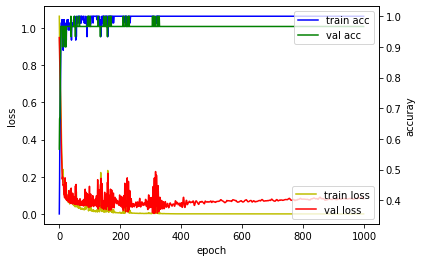

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(history1.history['loss'], 'y', label='train loss')
loss_ax.plot(history1.history['val_loss'], 'r', label='val loss')
acc_ax.plot(history1.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history1.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [ ]:
loss_and_metrics = model1.evaluate(X_test, y_test)
print('## 손실과 정확도 평가  ##')
print(loss_and_metrics)

1/1 [==============================] - 0s 15ms/step - loss: 1.0340 - accuracy: 0.8667
## 손실과 정확도 평가  ##
[1.0339733362197876, 0.8666666746139526]


In [ ]:
# 배치 정규화가 적용된 모델 생성
from tensorflow.keras.initializers import RandomNormal, Constant
model2 = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ),
    Dense(3, activation='softmax')
]);
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [ ]:
model2.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history2 = model2.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/1000
3/3 - 1s - loss: 1.0973 - accuracy: 0.5667 - val_loss: 1.0590 - val_accuracy: 0.3333
Epoch 2/1000
3/3 - 0s - loss: 0.2453 - accuracy: 0.9333 - val_loss: 1.0818 - val_accuracy: 0.3333
Epoch 3/1000
3/3 - 0s - loss: 0.0769 - accuracy: 1.0000 - val_loss: 1.1078 - val_accuracy: 0.3333
Epoch 4/1000
3/3 - 0s - loss: 0.1032 - accuracy: 0.9667 - val_loss: 1.1206 - val_accuracy: 0.3333
Epoch 5/1000
3/3 - 0s - loss: 0.0628 - accuracy: 0.9889 - val_loss: 1.0994 - val_accuracy: 0.3333
Epoch 6/1000
3/3 - 0s - loss: 0.0437 - accuracy: 0.9889 - val_loss: 1.0770 - val_accuracy: 0.3333
Epoch 7/1000
3/3 - 0s - loss: 0.0424 - accuracy: 1.0000 - val_loss: 1.0652 - val_accuracy: 0.3333
Epoch 8/1000
3/3 - 0s - loss: 0.0210 - accuracy: 1.0000 - val_loss: 1.0572 - val_accuracy: 0.3333
Epoch 9/1000
3/3 - 0s - loss: 0.0152 - accuracy: 1.0000 - val_loss: 1.0461 - val_accuracy: 0.3333
Epoch 10/1000
3/3 - 0s - loss: 0.0361 - accuracy: 0.9889 - val_loss: 1.0343 - val_accuracy: 0.3333
Epoch 11/1000
3/3 -

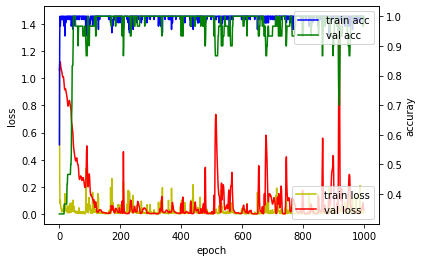

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history2.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [ ]:
loss_and_metrics = model2.evaluate(X_test, y_test)
print('## 손실과 정확도 평가  ##')
print(loss_and_metrics)

1/1 [==============================] - 0s 15ms/step - loss: 0.4203 - accuracy: 0.9000
## 손실과 정확도 평가  ##
[0.4203338623046875, 0.8999999761581421]


In [ ]:
#8.3.2 드롭아웃을 이용한 성능 최적화

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)
padded_shapes = ([None],())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete1OJWP2/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete1OJWP2/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete1OJWP2/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[  12,  109, 7968, ...,   14,   66, 7975],
       [ 768, 5236, 2127, ...,    0,    0,    0],
       [  19,  314,   18, ...,    0,    0,    0],
       ...,
       [ 373, 1669, 7748, ...,    0,    0,    0],
       [1566, 2815, 7968, ...,    0,    0,    0],
       [ 147,   41, 3330, ...,    0,    0,    0]])

In [ ]:
#드롭아웃이 적용되지 않은 모델을 생성
encoder = info.features['text'].encoder
model = tf.keras.Sequential([
tf.keras.layers.Embedding(encoder.vocab_size, 64),
tf.keras.layers.LSTM(64),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 88s 33ms/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6910 - val_accuracy: 0.5200
Epoch 2/5
2500/2500 [==============================] - 82s 33ms/step - loss: 0.6907 - accuracy: 0.5089 - val_loss: 0.6925 - val_accuracy: 0.5133
Epoch 3/5
2500/2500 [==============================] - 83s 33ms/step - loss: 0.6851 - accuracy: 0.5245 - val_loss: 0.6786 - val_accuracy: 0.5267
Epoch 4/5
2500/2500 [==============================] - 83s 33ms/step - loss: 0.6658 - accuracy: 0.5435 - val_loss: 0.6654 - val_accuracy: 0.5433
Epoch 5/5
2500/2500 [==============================] - 83s 33ms/step - loss: 0.6671 - accuracy: 0.5397 - val_loss: 0.6701 - val_accuracy: 0.5233


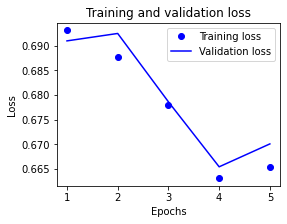

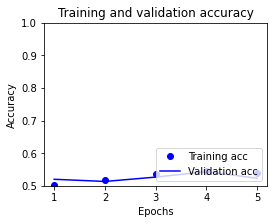

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [ ]:
#성능 향상을 위해 LSTM 대신 Bidirectional RNN로 바꾸고 드롭아웃을 적용
model = tf.keras.Sequential([
tf.keras.layers.Embedding(encoder.vocab_size, 64),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',          
              optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 270s 106ms/step - loss: 0.6630 - accuracy: 0.5658 - val_loss: 0.5408 - val_accuracy: 0.7400
Epoch 2/5
2500/2500 [==============================] - 270s 108ms/step - loss: 0.3927 - accuracy: 0.8368 - val_loss: 0.3249 - val_accuracy: 0.8800
Epoch 3/5
2500/2500 [==============================] - 271s 108ms/step - loss: 0.2621 - accuracy: 0.9054 - val_loss: 0.3643 - val_accuracy: 0.8767
Epoch 4/5
2500/2500 [==============================] - 271s 108ms/step - loss: 0.2168 - accuracy: 0.9233 - val_loss: 0.3712 - val_accuracy: 0.8600
Epoch 5/5
2500/2500 [==============================] - 268s 107ms/step - loss: 0.1631 - accuracy: 0.9482 - val_loss: 0.3998 - val_accuracy: 0.8800


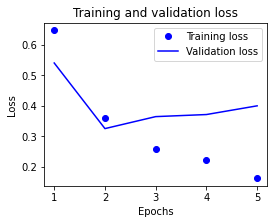

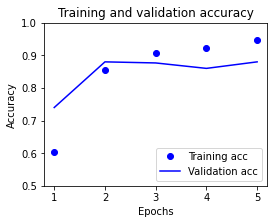

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [ ]:
#드롭아웃은 제거하고, Bidirectional RNN만 적용했을 때
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',          
              optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 149s 59ms/step - loss: 0.6060 - accuracy: 0.6138 - val_loss: 0.3224 - val_accuracy: 0.8800
Epoch 2/5
2500/2500 [==============================] - 145s 58ms/step - loss: 0.3149 - accuracy: 0.8781 - val_loss: 0.3968 - val_accuracy: 0.8667
Epoch 3/5
2500/2500 [==============================] - 146s 58ms/step - loss: 0.2438 - accuracy: 0.9094 - val_loss: 0.3759 - val_accuracy: 0.8533
Epoch 4/5
2500/2500 [==============================] - 145s 58ms/step - loss: 0.2156 - accuracy: 0.9228 - val_loss: 0.3674 - val_accuracy: 0.8600
Epoch 5/5
2500/2500 [==============================] - 145s 58ms/step - loss: 0.1806 - accuracy: 0.9387 - val_loss: 0.3895 - val_accuracy: 0.8500


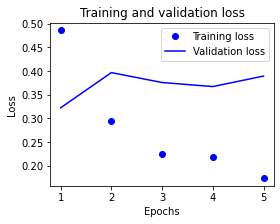

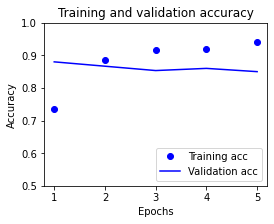

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [ ]:
#8.3.3 조기 종료를 이용한 성능 최적화
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb
import tensorflow as tf
import numpy as np

In [ ]:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 300
np.random.seed(7)

In [ ]:
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,verbose=1)

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# 조기종료를 적용하지 않은 모델
model = Sequential()
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250)              

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[cp_callback])

Epoch 1/300
625/625 [==============================] - 6s 8ms/step - loss: 0.5477 - accuracy: 0.6826 - val_loss: 0.2839 - val_accuracy: 0.8816

Epoch 00001: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 2/300
625/625 [==============================] - 5s 8ms/step - loss: 0.2407 - accuracy: 0.9017 - val_loss: 0.2654 - val_accuracy: 0.8954

Epoch 00002: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 3/300
625/625 [==============================] - 5s 8ms/step - loss: 0.1509 - accuracy: 0.9450 - val_loss: 0.2816 - val_accuracy: 0.8928

Epoch 00003: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 4/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0987 - accuracy: 0.9663 - val_loss: 0.3087 - val_accuracy: 0.8898

Epoch 00004: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 5/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0613 - accuracy: 0.9772 - val_loss: 0.3714 - val_accuracy: 0.8878

Epoch 00005: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 6/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0415 - accuracy: 0.9848 - val_loss: 0.4176 - val_accuracy: 0.8848

Epoch 00006: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 7/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0376 - accuracy: 0.9869 - val_loss: 0.4568 - val_accuracy: 0.8848

Epoch 00007: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 8/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0326 - accuracy: 0.9886 - val_loss: 0.5132 - val_accuracy: 0.8818

Epoch 00008: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 9/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.5298 - val_accuracy: 0.8838

Epoch 00009: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 10/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0234 - accuracy: 0.9913 - val_loss: 0.6329 - val_accuracy: 0.8652

Epoch 00010: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 11/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0315 - accuracy: 0.9878 - val_loss: 0.6002 - val_accuracy: 0.8738

Epoch 00011: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 12/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.5722 - val_accuracy: 0.8832

Epoch 00012: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 13/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0183 - accuracy: 0.9934 - val_loss: 0.6033 - val_accuracy: 0.8842

Epoch 00013: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 14/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.5517 - val_accuracy: 0.8862

Epoch 00014: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 15/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0138 - accuracy: 0.9950 - val_loss: 0.6198 - val_accuracy: 0.8852

Epoch 00015: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 16/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0148 - accuracy: 0.9938 - val_loss: 0.6451 - val_accuracy: 0.8832

Epoch 00016: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 17/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0164 - accuracy: 0.9940 - val_loss: 0.6038 - val_accuracy: 0.8898

Epoch 00017: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 18/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.6762 - val_accuracy: 0.8752

Epoch 00018: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 19/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0137 - accuracy: 0.9948 - val_loss: 0.6322 - val_accuracy: 0.8860

Epoch 00019: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 20/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0146 - accuracy: 0.9947 - val_loss: 0.6452 - val_accuracy: 0.8878

Epoch 00020: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 21/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0135 - accuracy: 0.9952 - val_loss: 0.6728 - val_accuracy: 0.8828

Epoch 00021: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 22/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.7471 - val_accuracy: 0.8752

Epoch 00022: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 23/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.6452 - val_accuracy: 0.8854

Epoch 00023: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 24/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.6576 - val_accuracy: 0.8794

Epoch 00024: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 25/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0120 - accuracy: 0.9955 - val_loss: 0.7974 - val_accuracy: 0.8858

Epoch 00025: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 26/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0084 - accuracy: 0.9968 - val_loss: 0.8814 - val_accuracy: 0.8710

Epoch 00026: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 27/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0125 - accuracy: 0.9954 - val_loss: 0.6572 - val_accuracy: 0.8810

Epoch 00027: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 28/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.6240 - val_accuracy: 0.8822

Epoch 00028: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 29/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0095 - accuracy: 0.9963 - val_loss: 0.8248 - val_accuracy: 0.8788

Epoch 00029: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 30/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0102 - accuracy: 0.9962 - val_loss: 0.8341 - val_accuracy: 0.8816

Epoch 00030: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 31/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.7032 - val_accuracy: 0.8852

Epoch 00031: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 32/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.6988 - val_accuracy: 0.8780

Epoch 00032: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 33/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 0.8163 - val_accuracy: 0.8770

Epoch 00033: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 34/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.7680 - val_accuracy: 0.8862

Epoch 00034: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 35/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0099 - accuracy: 0.9962 - val_loss: 0.8674 - val_accuracy: 0.8862

Epoch 00035: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 36/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.8279 - val_accuracy: 0.8762

Epoch 00036: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 37/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.7718 - val_accuracy: 0.8854

Epoch 00037: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 38/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.7958 - val_accuracy: 0.8856

Epoch 00038: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 39/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.7218 - val_accuracy: 0.8822

Epoch 00039: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 40/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.8029 - val_accuracy: 0.8852

Epoch 00040: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 41/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0074 - accuracy: 0.9972 - val_loss: 0.8507 - val_accuracy: 0.8844

Epoch 00041: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 42/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0067 - accuracy: 0.9973 - val_loss: 0.8465 - val_accuracy: 0.8842

Epoch 00042: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 43/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.8794 - val_accuracy: 0.8834

Epoch 00043: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 44/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0090 - accuracy: 0.9966 - val_loss: 0.8217 - val_accuracy: 0.8818

Epoch 00044: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 45/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.8258 - val_accuracy: 0.8824

Epoch 00045: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 46/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.7968 - val_accuracy: 0.8790

Epoch 00046: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 47/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.8182 - val_accuracy: 0.8856

Epoch 00047: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 48/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.9055 - val_accuracy: 0.8760

Epoch 00048: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 49/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.8891 - val_accuracy: 0.8838

Epoch 00049: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 50/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.7367 - val_accuracy: 0.8870

Epoch 00050: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 51/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0061 - accuracy: 0.9976 - val_loss: 0.9310 - val_accuracy: 0.8776

Epoch 00051: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 52/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.9427 - val_accuracy: 0.8862

Epoch 00052: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 53/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.8960 - val_accuracy: 0.8868

Epoch 00053: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 54/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.9572 - val_accuracy: 0.8788

Epoch 00054: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 55/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.8950 - val_accuracy: 0.8854

Epoch 00055: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 56/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.8521 - val_accuracy: 0.8830

Epoch 00056: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 57/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.9021 - val_accuracy: 0.8838

Epoch 00057: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 58/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0061 - accuracy: 0.9977 - val_loss: 0.9068 - val_accuracy: 0.8866

Epoch 00058: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 59/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.9539 - val_accuracy: 0.8850

Epoch 00059: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 60/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0078 - accuracy: 0.9971 - val_loss: 0.8638 - val_accuracy: 0.8836

Epoch 00060: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 61/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.8744 - val_accuracy: 0.8846

Epoch 00061: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 62/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.9326 - val_accuracy: 0.8804

Epoch 00062: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 63/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.9602 - val_accuracy: 0.8878

Epoch 00063: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 64/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.8487 - val_accuracy: 0.8790

Epoch 00064: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 65/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.8217 - val_accuracy: 0.8828

Epoch 00065: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 66/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.9146 - val_accuracy: 0.8840

Epoch 00066: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 67/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.9109 - val_accuracy: 0.8864

Epoch 00067: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 68/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0035 - accuracy: 0.9984 - val_loss: 0.9817 - val_accuracy: 0.8846

Epoch 00068: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 69/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.9389 - val_accuracy: 0.8876

Epoch 00069: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 70/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0035 - accuracy: 0.9986 - val_loss: 0.9063 - val_accuracy: 0.8846

Epoch 00070: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 71/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 1.0948 - val_accuracy: 0.8720

Epoch 00071: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 72/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0074 - accuracy: 0.9981 - val_loss: 0.8305 - val_accuracy: 0.8804

Epoch 00072: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 73/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.9746 - val_accuracy: 0.8862

Epoch 00073: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 74/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.8631 - val_accuracy: 0.8762

Epoch 00074: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 75/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0059 - accuracy: 0.9975 - val_loss: 0.7979 - val_accuracy: 0.8842

Epoch 00075: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 76/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.9754 - val_accuracy: 0.8898

Epoch 00076: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 77/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.8589 - val_accuracy: 0.8826

Epoch 00077: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 78/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.7814 - val_accuracy: 0.8872

Epoch 00078: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 79/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.8354 - val_accuracy: 0.8862

Epoch 00079: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 80/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0056 - accuracy: 0.9977 - val_loss: 0.8960 - val_accuracy: 0.8872

Epoch 00080: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 81/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.8959 - val_accuracy: 0.8930

Epoch 00081: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 82/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.8920 - val_accuracy: 0.8864

Epoch 00082: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 83/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.9717 - val_accuracy: 0.8898

Epoch 00083: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 84/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.9263 - val_accuracy: 0.8848

Epoch 00084: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 85/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.9258 - val_accuracy: 0.8800

Epoch 00085: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 86/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.8266 - val_accuracy: 0.8870

Epoch 00086: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 87/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.9658 - val_accuracy: 0.8788

Epoch 00087: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 88/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0031 - accuracy: 0.9988 - val_loss: 1.1761 - val_accuracy: 0.8854

Epoch 00088: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 89/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.9785 - val_accuracy: 0.8812

Epoch 00089: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 90/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 1.0015 - val_accuracy: 0.8838

Epoch 00090: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 91/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.9060 - val_accuracy: 0.8854

Epoch 00091: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 92/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 0.9469 - val_accuracy: 0.8860

Epoch 00092: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 93/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 1.1072 - val_accuracy: 0.8858

Epoch 00093: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 94/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 1.0660 - val_accuracy: 0.8888

Epoch 00094: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 95/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.9323 - val_accuracy: 0.8828

Epoch 00095: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 96/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0036 - accuracy: 0.9985 - val_loss: 1.0621 - val_accuracy: 0.8792

Epoch 00096: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 97/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.8814 - val_accuracy: 0.8910

Epoch 00097: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 98/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 1.0007 - val_accuracy: 0.8874

Epoch 00098: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 99/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 1.0209 - val_accuracy: 0.8850

Epoch 00099: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 100/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.9996 - val_accuracy: 0.8834

Epoch 00100: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 101/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.0555 - val_accuracy: 0.8836

Epoch 00101: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 102/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.9203 - val_accuracy: 0.8832

Epoch 00102: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 103/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0033 - accuracy: 0.9985 - val_loss: 1.0093 - val_accuracy: 0.8802

Epoch 00103: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 104/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.9515 - val_accuracy: 0.8834

Epoch 00104: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 105/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.9942 - val_accuracy: 0.8870

Epoch 00105: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 106/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.9307 - val_accuracy: 0.8868

Epoch 00106: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 107/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 1.1322 - val_accuracy: 0.8888

Epoch 00107: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 108/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 1.1533 - val_accuracy: 0.8828

Epoch 00108: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 109/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 1.1550 - val_accuracy: 0.8854

Epoch 00109: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 110/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 1.2706 - val_accuracy: 0.8856

Epoch 00110: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 111/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0028 - accuracy: 0.9988 - val_loss: 1.0973 - val_accuracy: 0.8886

Epoch 00111: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 112/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 1.3093 - val_accuracy: 0.8762

Epoch 00112: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 113/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 1.1026 - val_accuracy: 0.8860

Epoch 00113: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 114/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0022 - accuracy: 0.9990 - val_loss: 1.1457 - val_accuracy: 0.8858

Epoch 00114: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 115/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0043 - accuracy: 0.9983 - val_loss: 0.8981 - val_accuracy: 0.8842

Epoch 00115: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 116/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 0.9784 - val_accuracy: 0.8844

Epoch 00116: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 117/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 1.1519 - val_accuracy: 0.8850

Epoch 00117: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 118/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.1480 - val_accuracy: 0.8820

Epoch 00118: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 119/300
625/625 [==============================] - 5s 8ms/step - loss: 6.2450e-04 - accuracy: 0.9998 - val_loss: 1.2717 - val_accuracy: 0.8846

Epoch 00119: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 120/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.9325 - val_accuracy: 0.8822

Epoch 00120: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 121/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.0709 - val_accuracy: 0.8826

Epoch 00121: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 122/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.2444 - val_accuracy: 0.8808

Epoch 00122: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 123/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 1.2997 - val_accuracy: 0.8712

Epoch 00123: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 124/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 1.0832 - val_accuracy: 0.8814

Epoch 00124: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 125/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 1.1912 - val_accuracy: 0.8830

Epoch 00125: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 126/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 1.2266 - val_accuracy: 0.8808

Epoch 00126: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 127/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0045 - accuracy: 0.9983 - val_loss: 1.1018 - val_accuracy: 0.8812

Epoch 00127: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 128/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.1004 - val_accuracy: 0.8804

Epoch 00128: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 129/300
625/625 [==============================] - 5s 8ms/step - loss: 9.8277e-04 - accuracy: 0.9997 - val_loss: 1.0531 - val_accuracy: 0.8794

Epoch 00129: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 130/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 1.0013 - val_accuracy: 0.8834

Epoch 00130: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 131/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 1.0819 - val_accuracy: 0.8826

Epoch 00131: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 132/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 1.3601 - val_accuracy: 0.8742

Epoch 00132: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 133/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 1.2117 - val_accuracy: 0.8842

Epoch 00133: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 134/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 1.3223 - val_accuracy: 0.8718

Epoch 00134: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 135/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 1.0157 - val_accuracy: 0.8828

Epoch 00135: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 136/300
625/625 [==============================] - 5s 8ms/step - loss: 6.0022e-04 - accuracy: 0.9999 - val_loss: 1.2651 - val_accuracy: 0.8772

Epoch 00136: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 137/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9993 - val_loss: 1.2150 - val_accuracy: 0.8740

Epoch 00137: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 138/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 1.1161 - val_accuracy: 0.8828

Epoch 00138: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 139/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 1.2666 - val_accuracy: 0.8828

Epoch 00139: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 140/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 1.1897 - val_accuracy: 0.8796

Epoch 00140: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 141/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 1.4377 - val_accuracy: 0.8816

Epoch 00141: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 142/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 1.2572 - val_accuracy: 0.8786

Epoch 00142: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 143/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 1.3037 - val_accuracy: 0.8694

Epoch 00143: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 144/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 1.3676 - val_accuracy: 0.8796

Epoch 00144: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 145/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 1.0648 - val_accuracy: 0.8766

Epoch 00145: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 146/300
625/625 [==============================] - 5s 8ms/step - loss: 9.7585e-04 - accuracy: 0.9997 - val_loss: 1.0075 - val_accuracy: 0.8780

Epoch 00146: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 147/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 1.1745 - val_accuracy: 0.8784

Epoch 00147: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 148/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 1.2769 - val_accuracy: 0.8768

Epoch 00148: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 149/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 1.2878 - val_accuracy: 0.8788

Epoch 00149: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 150/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 1.4128 - val_accuracy: 0.8774

Epoch 00150: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 151/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 1.4538 - val_accuracy: 0.8800

Epoch 00151: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 152/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.2903 - val_accuracy: 0.8810

Epoch 00152: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 153/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 1.3296 - val_accuracy: 0.8678

Epoch 00153: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 154/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9992 - val_loss: 1.4466 - val_accuracy: 0.8778

Epoch 00154: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 155/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 1.2721 - val_accuracy: 0.8792

Epoch 00155: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 156/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 1.2825 - val_accuracy: 0.8798

Epoch 00156: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 157/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0036 - accuracy: 0.9984 - val_loss: 1.2816 - val_accuracy: 0.8744

Epoch 00157: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 158/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.3445 - val_accuracy: 0.8786

Epoch 00158: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 159/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 1.2424 - val_accuracy: 0.8782

Epoch 00159: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 160/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 1.2158 - val_accuracy: 0.8768

Epoch 00160: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 161/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.3347 - val_accuracy: 0.8754

Epoch 00161: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 162/300
625/625 [==============================] - 5s 8ms/step - loss: 9.3705e-04 - accuracy: 0.9995 - val_loss: 1.2974 - val_accuracy: 0.8778

Epoch 00162: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 163/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 1.2478 - val_accuracy: 0.8772

Epoch 00163: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 164/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 1.2403 - val_accuracy: 0.8778

Epoch 00164: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 165/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.2538 - val_accuracy: 0.8796

Epoch 00165: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 166/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9993 - val_loss: 1.1860 - val_accuracy: 0.8802

Epoch 00166: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 167/300
625/625 [==============================] - 5s 8ms/step - loss: 1.8653e-04 - accuracy: 1.0000 - val_loss: 1.3813 - val_accuracy: 0.8802

Epoch 00167: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 168/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 1.3370 - val_accuracy: 0.8822

Epoch 00168: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 169/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 1.2406 - val_accuracy: 0.8804

Epoch 00169: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 170/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 1.3843 - val_accuracy: 0.8778

Epoch 00170: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 171/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0030 - accuracy: 0.9988 - val_loss: 1.2908 - val_accuracy: 0.8806

Epoch 00171: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 172/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0023 - accuracy: 0.9989 - val_loss: 1.3660 - val_accuracy: 0.8808

Epoch 00172: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 173/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 1.2339 - val_accuracy: 0.8836

Epoch 00173: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 174/300
625/625 [==============================] - 5s 8ms/step - loss: 7.6150e-04 - accuracy: 0.9997 - val_loss: 1.4987 - val_accuracy: 0.8830

Epoch 00174: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 175/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0023 - accuracy: 0.9989 - val_loss: 1.4886 - val_accuracy: 0.8790

Epoch 00175: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 176/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 1.3045 - val_accuracy: 0.8836

Epoch 00176: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 177/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 1.1539 - val_accuracy: 0.8824

Epoch 00177: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 178/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 1.2920 - val_accuracy: 0.8820

Epoch 00178: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 179/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 1.3538 - val_accuracy: 0.8794

Epoch 00179: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 180/300
625/625 [==============================] - 5s 8ms/step - loss: 8.0599e-04 - accuracy: 0.9996 - val_loss: 1.4688 - val_accuracy: 0.8796

Epoch 00180: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 181/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.5244 - val_accuracy: 0.8744

Epoch 00181: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 182/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.5010 - val_accuracy: 0.8822

Epoch 00182: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 183/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 1.5514 - val_accuracy: 0.8786

Epoch 00183: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 184/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 1.5932 - val_accuracy: 0.8850

Epoch 00184: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 185/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 1.2237 - val_accuracy: 0.8804

Epoch 00185: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 186/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 1.4041 - val_accuracy: 0.8838

Epoch 00186: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 187/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 1.3543 - val_accuracy: 0.8808

Epoch 00187: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 188/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 1.1567 - val_accuracy: 0.8818

Epoch 00188: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 189/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 1.2345 - val_accuracy: 0.8866

Epoch 00189: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 190/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 1.0317 - val_accuracy: 0.8840

Epoch 00190: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 191/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 1.2450 - val_accuracy: 0.8826

Epoch 00191: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 192/300
625/625 [==============================] - 5s 8ms/step - loss: 8.6051e-04 - accuracy: 0.9998 - val_loss: 1.4794 - val_accuracy: 0.8782

Epoch 00192: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 193/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 1.3527 - val_accuracy: 0.8848

Epoch 00193: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 194/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 1.2477 - val_accuracy: 0.8774

Epoch 00194: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 195/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.8902 - val_accuracy: 0.8868

Epoch 00195: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 196/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 1.3867 - val_accuracy: 0.8756

Epoch 00196: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 197/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 1.4101 - val_accuracy: 0.8776

Epoch 00197: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 198/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 1.4243 - val_accuracy: 0.8834

Epoch 00198: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 199/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 1.2687 - val_accuracy: 0.8838

Epoch 00199: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 200/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 1.1516 - val_accuracy: 0.8844

Epoch 00200: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 201/300
625/625 [==============================] - 5s 8ms/step - loss: 7.5357e-04 - accuracy: 0.9998 - val_loss: 1.3466 - val_accuracy: 0.8778

Epoch 00201: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 202/300
625/625 [==============================] - 5s 8ms/step - loss: 6.9879e-04 - accuracy: 0.9998 - val_loss: 1.5895 - val_accuracy: 0.8828

Epoch 00202: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 203/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 1.2877 - val_accuracy: 0.8754

Epoch 00203: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 204/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 1.2671 - val_accuracy: 0.8822

Epoch 00204: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 205/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0023 - accuracy: 0.9990 - val_loss: 1.2457 - val_accuracy: 0.8832

Epoch 00205: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 206/300
625/625 [==============================] - 5s 8ms/step - loss: 4.6524e-04 - accuracy: 0.9998 - val_loss: 1.5440 - val_accuracy: 0.8830

Epoch 00206: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 207/300
625/625 [==============================] - 5s 8ms/step - loss: 6.1983e-04 - accuracy: 0.9998 - val_loss: 1.3464 - val_accuracy: 0.8852

Epoch 00207: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 208/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 1.2178 - val_accuracy: 0.8846

Epoch 00208: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 209/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 1.4480 - val_accuracy: 0.8816

Epoch 00209: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 210/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 1.5471 - val_accuracy: 0.8824

Epoch 00210: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 211/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 1.4945 - val_accuracy: 0.8830

Epoch 00211: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 212/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 1.2687 - val_accuracy: 0.8802

Epoch 00212: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 213/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 1.2582 - val_accuracy: 0.8796

Epoch 00213: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 214/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 1.1899 - val_accuracy: 0.8814

Epoch 00214: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 215/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 1.3831 - val_accuracy: 0.8816

Epoch 00215: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 216/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9991 - val_loss: 1.3448 - val_accuracy: 0.8738

Epoch 00216: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 217/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 1.4763 - val_accuracy: 0.8798

Epoch 00217: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 218/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 1.4107 - val_accuracy: 0.8758

Epoch 00218: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 219/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 1.2571 - val_accuracy: 0.8802

Epoch 00219: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 220/300
625/625 [==============================] - 5s 8ms/step - loss: 3.1427e-04 - accuracy: 0.9999 - val_loss: 1.5384 - val_accuracy: 0.8810

Epoch 00220: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 221/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 1.5367 - val_accuracy: 0.8782

Epoch 00221: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 222/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9991 - val_loss: 1.6176 - val_accuracy: 0.8778

Epoch 00222: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 223/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 1.4488 - val_accuracy: 0.8800

Epoch 00223: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 224/300
625/625 [==============================] - 5s 8ms/step - loss: 9.8413e-04 - accuracy: 0.9997 - val_loss: 1.5780 - val_accuracy: 0.8798

Epoch 00224: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 225/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9992 - val_loss: 1.6305 - val_accuracy: 0.8758

Epoch 00225: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 226/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 1.4995 - val_accuracy: 0.8768

Epoch 00226: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 227/300
625/625 [==============================] - 5s 8ms/step - loss: 7.0099e-04 - accuracy: 0.9998 - val_loss: 1.4229 - val_accuracy: 0.8800

Epoch 00227: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 228/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.5603 - val_accuracy: 0.8792

Epoch 00228: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 229/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 1.2929 - val_accuracy: 0.8804

Epoch 00229: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 230/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.5294 - val_accuracy: 0.8816

Epoch 00230: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 231/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 1.6489 - val_accuracy: 0.8808

Epoch 00231: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 232/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 1.6147 - val_accuracy: 0.8812

Epoch 00232: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 233/300
625/625 [==============================] - 5s 8ms/step - loss: 8.1078e-04 - accuracy: 0.9997 - val_loss: 1.8262 - val_accuracy: 0.8780

Epoch 00233: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 234/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 1.4440 - val_accuracy: 0.8742

Epoch 00234: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 235/300
625/625 [==============================] - 5s 8ms/step - loss: 8.7846e-04 - accuracy: 0.9997 - val_loss: 1.6411 - val_accuracy: 0.8756

Epoch 00235: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 236/300
625/625 [==============================] - 5s 8ms/step - loss: 6.4457e-04 - accuracy: 0.9999 - val_loss: 1.7925 - val_accuracy: 0.8708

Epoch 00236: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 237/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 1.6464 - val_accuracy: 0.8806

Epoch 00237: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 238/300
625/625 [==============================] - 5s 8ms/step - loss: 8.9841e-04 - accuracy: 0.9998 - val_loss: 1.4310 - val_accuracy: 0.8788

Epoch 00238: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 239/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.5774 - val_accuracy: 0.8798

Epoch 00239: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 240/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 1.5893 - val_accuracy: 0.8796

Epoch 00240: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 241/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 1.2414 - val_accuracy: 0.8796

Epoch 00241: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 242/300
625/625 [==============================] - 5s 8ms/step - loss: 6.3889e-04 - accuracy: 0.9997 - val_loss: 1.7835 - val_accuracy: 0.8800

Epoch 00242: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 243/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 1.4037 - val_accuracy: 0.8806

Epoch 00243: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 244/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 1.4641 - val_accuracy: 0.8762

Epoch 00244: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 245/300
625/625 [==============================] - 5s 8ms/step - loss: 3.8417e-04 - accuracy: 0.9998 - val_loss: 1.4485 - val_accuracy: 0.8812

Epoch 00245: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 246/300
625/625 [==============================] - 5s 8ms/step - loss: 9.8037e-04 - accuracy: 0.9998 - val_loss: 1.3528 - val_accuracy: 0.8810

Epoch 00246: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 247/300
625/625 [==============================] - 5s 8ms/step - loss: 9.8801e-04 - accuracy: 0.9995 - val_loss: 1.5603 - val_accuracy: 0.8790

Epoch 00247: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 248/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0027 - accuracy: 0.9988 - val_loss: 1.6070 - val_accuracy: 0.8784

Epoch 00248: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 249/300
625/625 [==============================] - 5s 8ms/step - loss: 8.5002e-04 - accuracy: 0.9996 - val_loss: 1.9612 - val_accuracy: 0.8790

Epoch 00249: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 250/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 1.7185 - val_accuracy: 0.8792

Epoch 00250: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 251/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 1.7560 - val_accuracy: 0.8782

Epoch 00251: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 252/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 1.5010 - val_accuracy: 0.8784

Epoch 00252: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 253/300
625/625 [==============================] - 5s 8ms/step - loss: 4.5216e-04 - accuracy: 0.9999 - val_loss: 1.4783 - val_accuracy: 0.8744

Epoch 00253: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 254/300
625/625 [==============================] - 5s 8ms/step - loss: 9.2809e-04 - accuracy: 0.9998 - val_loss: 1.7701 - val_accuracy: 0.8802

Epoch 00254: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 255/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 1.9107 - val_accuracy: 0.8812

Epoch 00255: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 256/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 1.6434 - val_accuracy: 0.8826

Epoch 00256: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 257/300
625/625 [==============================] - 5s 8ms/step - loss: 7.2066e-04 - accuracy: 0.9996 - val_loss: 1.8458 - val_accuracy: 0.8802

Epoch 00257: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 258/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 1.5954 - val_accuracy: 0.8840

Epoch 00258: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 259/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 1.4843 - val_accuracy: 0.8816

Epoch 00259: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 260/300
625/625 [==============================] - 5s 8ms/step - loss: 8.3291e-04 - accuracy: 0.9996 - val_loss: 1.7482 - val_accuracy: 0.8794

Epoch 00260: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 261/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 1.3981 - val_accuracy: 0.8830

Epoch 00261: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 262/300
625/625 [==============================] - 5s 8ms/step - loss: 7.2826e-04 - accuracy: 0.9999 - val_loss: 1.4569 - val_accuracy: 0.8846

Epoch 00262: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 263/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 1.5616 - val_accuracy: 0.8850

Epoch 00263: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 264/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 1.6552 - val_accuracy: 0.8782

Epoch 00264: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 265/300
625/625 [==============================] - 5s 8ms/step - loss: 8.5743e-04 - accuracy: 0.9997 - val_loss: 1.4559 - val_accuracy: 0.8830

Epoch 00265: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 266/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 1.9767 - val_accuracy: 0.8730

Epoch 00266: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 267/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 1.7496 - val_accuracy: 0.8816

Epoch 00267: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 268/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 1.5813 - val_accuracy: 0.8784

Epoch 00268: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 269/300
625/625 [==============================] - 5s 8ms/step - loss: 6.4759e-04 - accuracy: 0.9997 - val_loss: 1.6809 - val_accuracy: 0.8828

Epoch 00269: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 270/300
625/625 [==============================] - 5s 8ms/step - loss: 8.9338e-04 - accuracy: 0.9997 - val_loss: 1.5208 - val_accuracy: 0.8818

Epoch 00270: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 271/300
625/625 [==============================] - 5s 8ms/step - loss: 9.8567e-04 - accuracy: 0.9995 - val_loss: 1.4030 - val_accuracy: 0.8836

Epoch 00271: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 272/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 1.3118 - val_accuracy: 0.8838

Epoch 00272: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 273/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0026 - accuracy: 0.9989 - val_loss: 1.3184 - val_accuracy: 0.8840

Epoch 00273: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 274/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 1.5276 - val_accuracy: 0.8828

Epoch 00274: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 275/300
625/625 [==============================] - 5s 8ms/step - loss: 7.5669e-04 - accuracy: 0.9998 - val_loss: 1.5084 - val_accuracy: 0.8830

Epoch 00275: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 276/300
625/625 [==============================] - 5s 8ms/step - loss: 7.4190e-04 - accuracy: 0.9997 - val_loss: 1.6645 - val_accuracy: 0.8842

Epoch 00276: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 277/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 1.5050 - val_accuracy: 0.8842

Epoch 00277: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 278/300
625/625 [==============================] - 5s 8ms/step - loss: 2.7053e-04 - accuracy: 1.0000 - val_loss: 1.6655 - val_accuracy: 0.8826

Epoch 00278: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 279/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.5283 - val_accuracy: 0.8802

Epoch 00279: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 280/300
625/625 [==============================] - 5s 8ms/step - loss: 8.6370e-04 - accuracy: 0.9999 - val_loss: 1.5643 - val_accuracy: 0.8804

Epoch 00280: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 281/300
625/625 [==============================] - 5s 8ms/step - loss: 1.9511e-04 - accuracy: 0.9999 - val_loss: 1.7607 - val_accuracy: 0.8824

Epoch 00281: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 282/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 1.6761 - val_accuracy: 0.8798

Epoch 00282: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 283/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 1.2833 - val_accuracy: 0.8820

Epoch 00283: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 284/300
625/625 [==============================] - 5s 8ms/step - loss: 8.2129e-04 - accuracy: 0.9997 - val_loss: 1.4774 - val_accuracy: 0.8818

Epoch 00284: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 285/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 1.4723 - val_accuracy: 0.8872

Epoch 00285: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 286/300
625/625 [==============================] - 5s 8ms/step - loss: 2.6102e-04 - accuracy: 0.9999 - val_loss: 1.6310 - val_accuracy: 0.8854

Epoch 00286: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 287/300
625/625 [==============================] - 5s 8ms/step - loss: 3.1264e-05 - accuracy: 1.0000 - val_loss: 1.9491 - val_accuracy: 0.8838

Epoch 00287: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 288/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 1.6475 - val_accuracy: 0.8850

Epoch 00288: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 289/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 1.6728 - val_accuracy: 0.8832

Epoch 00289: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 290/300
625/625 [==============================] - 5s 8ms/step - loss: 3.1145e-04 - accuracy: 1.0000 - val_loss: 1.4692 - val_accuracy: 0.8828

Epoch 00290: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 291/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 1.9564 - val_accuracy: 0.8838

Epoch 00291: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 292/300
625/625 [==============================] - 5s 8ms/step - loss: 5.5277e-04 - accuracy: 0.9998 - val_loss: 1.7861 - val_accuracy: 0.8834

Epoch 00292: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 293/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 1.7790 - val_accuracy: 0.8800

Epoch 00293: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 294/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 1.9839 - val_accuracy: 0.8816

Epoch 00294: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 295/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 2.0549 - val_accuracy: 0.8746

Epoch 00295: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 296/300
625/625 [==============================] - 5s 8ms/step - loss: 2.3746e-04 - accuracy: 0.9999 - val_loss: 1.8539 - val_accuracy: 0.8810

Epoch 00296: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 297/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 1.7457 - val_accuracy: 0.8808

Epoch 00297: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 298/300
625/625 [==============================] - 5s 8ms/step - loss: 9.0608e-04 - accuracy: 0.9997 - val_loss: 1.5861 - val_accuracy: 0.8794

Epoch 00298: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 299/300
625/625 [==============================] - 5s 8ms/step - loss: 9.2640e-04 - accuracy: 0.9997 - val_loss: 1.7150 - val_accuracy: 0.8814

Epoch 00299: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 300/300
625/625 [==============================] - 5s 8ms/step - loss: 7.3069e-04 - accuracy: 0.9998 - val_loss: 1.7170 - val_accuracy: 0.8834

Epoch 00300: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


In [ ]:
from tensorflow.keras.models import load_model
model = load_model(checkpoint_path)
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

782/782 [==============================] - 2s 3ms/step - loss: 1.7759 - accuracy: 0.8741
Score: loss of 1.7758753299713135; accuracy of 87.40800023078918%


In [ ]:
#조기 종료를 적용한 모델
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2, 
          callbacks=keras_callbacks)


Epoch 1/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 2.5686 - val_accuracy: 0.8796
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 2/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 2.5020 - val_accuracy: 0.8828
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 3/300
625/625 [==============================] - 5s 8ms/step - loss: 1.1129e-04 - accuracy: 0.9999 - val_loss: 2.5276 - val_accuracy: 0.8830
Epoch 4/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 2.2850 - val_accuracy: 0.8814
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 5/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 2.6906 - val_accuracy: 0.8786
Epoch 6/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 2.3367 - val_accuracy: 0.8756
Epoch 7/300
625/625 [==============================] - 5s 8ms/step - loss: 8.8097e-04 - accuracy: 0.9998 - val_loss: 2.3466 - val_accuracy: 0.8804
Epoch 8/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 1.7425 - val_accuracy: 0.8788
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 9/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 1.7627 - val_accuracy: 0.8844
Epoch 10/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 1.7908 - val_accuracy: 0.8850
Epoch 11/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 1.7627 - val_accuracy: 0.8824
Epoch 12/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 2.1485 - val_accuracy: 0.8780
Epoch 13/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 2.2926 - val_accuracy: 0.8842
Epoch 14/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 2.1570 - val_accuracy: 0.8836
Epoch 15/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 1.4910 - val_accuracy: 

INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 16/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 1.8035 - val_accuracy: 0.8836
Epoch 17/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 1.8579 - val_accuracy: 0.8782
Epoch 18/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 2.0498 - val_accuracy: 0.8644
Epoch 19/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 1.7758 - val_accuracy: 0.8796
Epoch 20/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.6727 - val_accuracy: 0.8816
Epoch 21/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 1.6196 - val_accuracy: 0.8822
Epoch 22/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.7666 - val_accuracy:

INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


Epoch 32/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 1.7337 - val_accuracy: 0.8818
Epoch 33/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 1.5023 - val_accuracy: 0.8824
Epoch 34/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.7500 - val_accuracy: 0.8840
Epoch 35/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 2.2028 - val_accuracy: 0.8742
Epoch 36/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 1.9223 - val_accuracy: 0.8840
Epoch 37/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 1.8787 - val_accuracy: 0.8836
Epoch 38/300
625/625 [==============================] - 5s 8ms/step - loss: 8.7570e-04 - accuracy: 0.9997 - val_loss: 2.0311 - val_accur

In [ ]:
model = load_model(checkpoint_path)
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

782/782 [==============================] - 2s 3ms/step - loss: 1.4252 - accuracy: 0.8746
Score: loss of 1.425233244895935; accuracy of 87.46399879455566%
